<span style="font-size:x-large;">Lab 7</span>

# Feel the Heat!

<div>
    <img src="temperature-anomolies.gif" width=700><br><br>
</div>

Source: [110 Years of Australian Temperatures](http://www.bom.gov.au/climate/history/temperature/), Bureau of Meteorology

We might *[love a sunburnt country](https://en.wikipedia.org/wiki/My_Country#/media/File:My_Country_part_1.jpg)*, but Dorothea Mackellar in 1908 couldn't have envisioned quite how sunburnt its getting!

The 2019 temperature anomolies map (shown above) paints another alarming picture!

In this lab, we will again examine raw data from the Bureau of Meteorology. This time we will focus on maximum temperatures for Western Australian towns, form the north to the south.


## Working with 2-Dimensional Arrays

This lab assignment provides a lot of practice working with 2-d arrays. _It introduces some important new concepts._

Because of this and the length of lab the due date will be at little later than usual - the due date will be **10am on Tuesday 29th September**.

Because it will involve working through new concepts it may take a few sessions to work though it, so its important not to leave it until close to the due date.

## Data Acquisition and Inspection

Once again we will source our data from the Australian Government's **Bureau of Meteorology (BOM)** *Climate Data Online* service.

* Find the monthly average maximum temperature data.
* Find and download the historical data for:
  * Perth Airport
  * Geraldton Town
  * Albany
  * Broome Airport
* Upload the data to your CoCalc project. You should upload the whole folder for each town, it should not be more than about 60KB each.

* Read one of the `Note.txt` files so that you can see what is in each file, and the structure.
* Inspect one of each type of data file to see that they conform to your expectations from reading the Note.


#### Set up

We will set up our constants as follows.

- In this lab we will use the second kind of file discussed in Note.txt (12 months per line).

- We will use a dictionary to map town names to the station codes. This will allow us to easily find the data for each town.

- For simplicity we will only use one product (monthly maximum temperatures), however you can see that we could easily generalise this to other data sets (products) in a similar way to the stations.

In [1]:
PRODUCT = "IDCJAC0002"
MONTH12 = "Data12.csv"

STATIONS = {"Albany": "009500",
            "Perth": "009021",
            "Broome": "003003",
            "Geraldton": "008050"
           }

#### File paths

Lets start with a small utility function.

* Using `str.format()`, write a function `temps_file(town)` that returns the path to the file containing the twelve-monthly temperature table for `town`, where `town` is the town name (Albany, Perth, etc).

For example:

```
temps_file("Albany")

'IDCJAC0002_009500/IDCJAC0002_009500_Data12.csv'
```

You can find out about string formatting using `format()` at: https://docs.python.org/3.8/library/string.html#format-string-syntax. If you are not familiar with specification languages (you are not expected to be) it is better to look at the examples for this one.

(You should use the the "new" `{}` formatting, not the "old" `%` formatting.)

In [2]:
def temps_file(town):
    station_code = STATIONS[town]
    folder_name = "{}_{}".format(PRODUCT, station_code)
    file_name = "{}_{}_{}".format(PRODUCT, station_code, MONTH12)

    #return folder_name + "/" + file_name
    return "{}/{}".format(folder_name, file_name)

print(temps_file("Albany"))

IDCJAC0002_009500/IDCJAC0002_009500_Data12.csv


#### `np.genfromtxt`

While `csv` is particularly targeted at reading csv (like) files, a range of other libraries include their own bespoke file/buffer/string parsers.

For example, `numpy` has `fromstring`, `loadtxt` and the more general `genfromtxt` (as well as others for different file/buffer types).

`genfromtxt` is extremely versatile - for example, it allows us to skip rows, select columns and deal with missing values.

We've seen that our data has:
 * a header row, that we won't need for analysis
 * 16 columns, but not all of them are needed
 * missing values, represented by the string "null"
 
This makes `genfromtxt` a great choice.

* Read the API for `genfromtxt` in the latest version of the numpy manual.
* Read the data for Albany into an array `albany` (1 line of code). Your array should:
  * exclude the header line
  * exclude the first two columns (code and station number)
  * ensure any occurrences of "null" are replaced with `nan`
  

```
print(albany[-4:])

[[2017.    22.1   22.2   21.8   20.1   19.4   19.    15.9   16.7   17.5
    19.1   20.6   21.5   19.7]
 [2018.    22.4   23.    22.4   21.2   20.7   17.4   17.    16.2   17.
    19.    18.7   21.1   19.7]
 [2019.    22.2   22.2   21.2   21.2   18.7   17.6   16.8   17.9   19.3
    19.3   19.4   23.5   19.9]
 [2020.    22.2   23.4   23.1   21.2   19.6   18.9   17.3    nan    nan
     nan    nan    nan    nan]]
```

*Hint: It is not immediately obvious from the API documentation, but by default missing values identified by `genfromtxt` for an array of floats will be entered as `np.nan`.*

The the resulting array should be of type float64. This should happen by default, you don't need to specify it - but you should check it (see `np.dtype`). As we know the array is homogeneous, so this includes the years, and the missing values.

* Print the shape of the array for Albany.


In [3]:
Albany_Filepath = temps_file("Albany")

import numpy as np

cols = tuple(np.arange(2, 16, 1))

albany = np.genfromtxt(Albany_Filepath, skip_header = 1, usecols = cols, delimiter = ',', missing_values = "null", filling_values = 'nan')

In [4]:
print(albany[-4:])

[[2017.    22.1   22.2   21.8   20.1   19.4   19.    15.9   16.7   17.5
    19.1   20.6   21.5   19.7]
 [2018.    22.4   23.    22.4   21.2   20.7   17.4   17.    16.2   17.
    19.    18.7   21.1   19.7]
 [2019.    22.2   22.2   21.2   21.2   18.7   17.6   16.8   17.9   19.3
    19.3   19.4   23.5   19.9]
 [2020.    22.2   23.4   23.1   21.2   19.6   18.9   17.3   16.9    nan
     nan    nan    nan    nan]]


In [5]:
# The shape of the array for Albany

print(albany.shape)

(105, 14)


#### Selecting items in 2-d arrays

We know how to select an item in a 1-d array using a slice. To select an item in a 2-d array, we just select the row and the column.

For example, `albany[0,-1]` will select the item in the last column of the first (zeroth) row, that is, the annual rainfall for 1880.

* Print out the annual rainfall for the last year in the table (1 line of code).
* Print out the annual rainfall for the second last year in the table.


In [6]:
# Print out the annual rainfall for the last year in the table (1 line of code).

print(albany[-1, -1])

nan


In [7]:
# Print out the annual rainfall for the second last year in the table.

print(albany[-2, -1])

19.9


#### Inspecting the year range for a town [1 lab mark]

* Write a function `year_range(town)` that returns a pair of integers representing the first year and the last year included in that town's table (you may assume the tables are always in the correct format and in chronological order).

You should use `genfromtxt` to read the data, and then use array selection (no loops). This should only take a couple of lines of code!

Check your answers for the various towns are correct.

In [8]:
def year_range(town):
    filepath = temps_file(town)
    cols = tuple(np.arange(2, 16, 1))

    data = np.genfromtxt(filepath, skip_header = 1, usecols = cols, delimiter = ',', missing_values = "null", filling_values = 'nan')

    first_year, last_year = data[0][0], data[-1][0]
    return int(first_year), int(last_year)

In [9]:
year_range("Geraldton")

(1880, 1953)

In [10]:
from nose.tools import assert_equal
assert_equal(year_range("Albany"), (1880, 2020))
print("So far, so good. Additional tests will be applied.")


So far, so good. Additional tests will be applied.


#### Collecting all the data

* Write a function `get_temps()` that, by iterating through the `STATIONS` dictionary in alphabetical order, returns:
  * a list of town names in alphabetical order
  * a list of arrays containing the corresponding tables of temperature data (from the year to the average annual rainfall)

So that you can observe the progress and get a better idea of what data is there, output the town, rows of data and first and last years for each town. For example:

```
(towns, tables) = get_temps()

Collecting data for Albany   :  105 years recorded between 1880 and 2020
Collecting data for Broome   :   82 years recorded between 1939 and 2020
Collecting data for Geraldton:   73 years recorded between 1880 and 1953
Collecting data for Perth    :   77 years recorded between 1944 and 2020
```

In [11]:
def get_temps():
    towns = sorted(STATIONS)
    tables = []
    cols = tuple(np.arange(2, 16, 1))

    for each_town in towns:
        station_name = each_town
        filepath = temps_file(station_name)
        data = np.genfromtxt(filepath, skip_header = 1, usecols = cols, delimiter = ',', missing_values = "null", filling_values = 'nan')
        tables.append(data)

        length_data = len(data)
        first_year, last_year = int(data[0][0]), int(data[-1][0])
        print("Collecting data for {}: {} years recorded between {} and {}".format(station_name, length_data, first_year, last_year))

    return towns, tables

In [12]:
(towns, tables) = get_temps()

#### A 'production' version [1 lab mark]

In this version the user has more control, including being able to turn the printed output on or off.

* Write a function `get_temperatures (stations, quiet=True)` with the same specification as `get_temps` except that:
  * a stations dictionary is passed to the function (rather than 'hard wired' to STATIONS)
  * it takes one optional argument, `quiet`, that defaults to `True`. If `quiet` is False, then it should print the output as it reads in the data, allowing the user to monitor it, otherwise it reads the data in `silently' (can be useful when called by other functions)


In [13]:
def get_temperatures(stations, quiet=True):

    towns = sorted(stations)
    tables = []
    cols = tuple(np.arange(2, 16, 1))

    for station in towns:
        filepath = temps_file(station)
        data = np.genfromtxt(filepath, skip_header = 1, usecols = cols, delimiter = ',', missing_values = "null", filling_values = 'nan')
        tables.append(data)

    if quiet == False:
        for i in range(len(towns)):
            station_name = towns[i]
            length_data = len(tables[i])
            first_year = int(tables[i][0][0])
            last_year = int(tables[i][-1][0])
            print("Collecting data for {}: {} years recorded between {} and {}".format(station_name, length_data, first_year, last_year))

    return towns, tables


In [14]:
from nose.tools import assert_equal
(towns, tables) = get_temperatures(STATIONS, quiet=True)
assert_equal(towns, ['Albany', 'Broome', 'Geraldton', 'Perth'])
geraldton = tables[towns.index("Geraldton")]
assert_equal(geraldton[0,0],1880.)
assert_equal(geraldton[1,-2],28.9)


## Data Cleaning and Conversion


#### Selecting a row or column

We can use the slice operators in the usual way to mean all the data between some bounds (optionally with step size). So to get all the years, for example, I can select all rows and the first (zeroth) column:

```
(towns, tables) = get_temperatures(STATIONS)
albany = tables[towns.index("Albany")]
albany[:,0]

array([1880., 1881., 1882., 1883., 1884., 1885., 1886., 1887., 1888.,
       1889., 1890., 1891., 1892., 1893., 1894., 1895., 1896., 1897.,
       1898., 1899., 1900., 1901., 1902., 1903., 1904., 1905., 1906.,
       1907., 1908., 1909., 1910., 1911., 1912., 1913., 1914., 1915.,
       1916., 1917., 1918., 1919., 1920., 1921., 1922., 1923., 1924.,
...
```

* Using Albany as an example, use array selection to return:
  * the first row of data
  * the last row of data
  * all the annual averages in the last column

In [15]:
(towns, tables) = get_temperatures(STATIONS)
albany = tables[towns.index("Albany")]

print("The first row of data:")
print(albany[0,:])

print()
print("The last row of data:")
print(albany[-1,:])

print()
print("All the annual averages in the last column:")
print(albany[:, -1])

The first row of data:
[1880.    22.1   22.8   20.6   19.2   17.5   14.7   15.1   15.2   16.2
   16.2   18.    20.8   18.2]

The last row of data:
[2020.    22.2   23.4   23.1   21.2   19.6   18.9   17.3   16.9    nan
    nan    nan    nan    nan]

All the annual averages in the last column:
[18.2 18.2 17.8 17.8 17.9 17.8 17.6 17.3 18.4 17.1 17.  18.3 18.8 18.9
 19.8 19.6 20.1 19.6 20.1 19.7 19.  19.8 19.4 18.8 19.7 18.9 19.7 20.1
 19.7 20.  20.2 20.  19.9 19.5 19.8 20.  20.  19.5 20.8 20.3 20.6 21.
 19.9 20.  20.  19.5 19.2 19.4 19.3 18.9 20.4 19.3 19.8 20.3 20.3 19.4
 19.8 20.   nan 19.9 20.4 20.  19.6 19.1 19.6 19.7 19.5 19.4 19.9 20.1
 20.  19.3 19.3 19.4 19.7 19.  19.3 20.2 19.8 20.1 18.8 20.3 20.1 20.1
 19.1  nan  nan 19.8 19.6 19.4 19.6 19.7 19.5 19.6 19.8 20.4 20.8 20.3
 20.3 20.3 19.4 19.7 19.7 19.9  nan]


#### Selecting an area

* Use a slice to select the first 4 months of data for the first 3 years recorded.

Your code should be of the form:<br>
`albany[`*select the 3 rows here*`,` *select the 4 columns here*`]`.

Check against the original csv file to ensure you have selected the correct data.

In [16]:
albany[:3, 1:5]

array([[22.1, 22.8, 20.6, 19.2],
       [20.1, 22.2, 22.2, 19.6],
       [20.2, 22.1, 20.1, 18.8]])

#### Two ways to skin a cat?

* Use selection to print the temperature for January 1882 (`albany[2,1]`).
* Now use selection to extract the row for 1882, then use selection on the result to extract the January reading (`albany[2][1])`.

What do you notice?

In [17]:
albany[2,1]

20.2

In [18]:
albany[2,:][1]

20.2

* Now use selection to extract the area containing the first 2 months of temperature data for the first 3 years, `albany[:3,1:3]`.

* Then try `albany[:3][1:3]`.

What do you find?

Why is it different? Why did it work for selecting one item?

* What would you need to put in the second set of brackets to get the same result? Try this out.

In [19]:
print(albany[:3, 1:3])

print()

print(albany[:3][1:3])

[[22.1 22.8]
 [20.1 22.2]
 [20.2 22.1]]

[[1881.    20.1   22.2   22.2   19.6   17.1   14.4   15.3   15.5   16.4
    16.1   18.7   20.7   18.2]
 [1882.    20.2   22.1   20.1   18.8   16.3   14.6   14.4   14.9   16.4
    17.3   17.8   20.8   17.8]]


**Student's Answer:** `albany[:3][1:3]` prints the rows of 1881 and 1882. It appears that Python has interpreted `albany[:3]` as taking the first 3 rows of `albany`, then taking the elements `[1:3]` in this subset of data. It works for selecting one item because when we select one specific year, we then only deal with 1-d data and can quickly extract one month using regular selection.

To print the first 2 months of temperature data for the first 3 years, we need to change the second set of brackets to `[:,1:3]`, that is to specify that we are only interested in the 2nd to 4th columns of a 2d dataset, not a subset of elements.


In [20]:
print(albany[:3][:,1:3])

[[22.1 22.8]
 [20.1 22.2]
 [20.2 22.1]]


### Verifying the data

* Using `np.mean()` and array selection, determine whether mean of the first 12 months of temperature is equal to the average annual rainfall reported for Albany for that year (1 line of code).

In [21]:
np.mean(albany[0,1:-1]) == albany[0,-1]

True

Complete the following without using any loops. (Each should take 1 line to do the operation, and one line to check the shape where relevant.)

* Select all of the monthly temperature data into an array (that is, all columns except the year and the temperature). Check the shape is as you would expect.
* Use `np.mean` with the `axis` argument to get an array of the means for each year, rounded to 1 decimal place. Check the shape (to ensure you used the right axis).
* Get a boolean array of all those years where the stated annual average is not equal to your calculated average. Check the shape.
* Use numpy's `any` to check whether there are any that are different.


In [22]:
print(albany.shape)

(105, 14)


In [23]:
# Select all of the monthly temperature data into an array. Should have the shape of (105, 12)
monthly_temp_data = albany[:, 1:-1]
print(monthly_temp_data.shape)

# Use np.mean with the axis argument to get an array of the means for each year, rounded to 1 decimal place. Should have the shape of (105, 1)
means_of_each = np.round(np.mean(monthly_temp_data, axis = 1), 1)
print(means_of_each.shape)

# Get a boolean array of all those years where the stated annual average is not equal to your calculated average. Should have the shape of (105, 1)
equals = np.array([True if means_of_each[i] != albany[i,-1] else False for i in range(albany.shape[0])])
print(equals.shape)

# Use numpy's any to check whether there are any that are different.
print(np.any(equals))

(105, 12)
(105,)
(105,)
True


* Use the boolean array from above as a mask to select all the rows in the Albany data where the averages don't match. (1 line of code)
* Change your line of code from above so that it prints just the year for each of the rows that don't match.


In [24]:
years_dont_match =  albany[equals][:,0]
print(years_dont_match)

[1905. 1920. 1929. 1938. 1948. 1965. 2002. 2008. 2016. 2020.]


Let's say we want to extract both the year and annual average columns from the rainfall table. We could do that using boolean masks with something like this:

```
cols = [True, False, False, False, False, False, False, False, False, False, False, False, False, True]
print(albany[mismatch][:,cols])
```
* Try this out. What is the shape of the resulting array?

Note that `cols` was automagically cast to an array in this demonstration. Better would be to define `cols` as an array.

* Repeat this with `cols` defined as an array.


In [25]:
mismatch = np.array([True if means_of_each[i] != albany[i,-1] else False for i in range(albany.shape[0])])
cols = np.array([True, False, False, False, False, False, False, False, False, False, False, False, False, True])

print(albany[mismatch][:,cols])

[[1905.    18.9]
 [1920.    20.6]
 [1929.    18.9]
 [1938.     nan]
 [1948.    19.9]
 [1965.     nan]
 [2002.     nan]
 [2008.    19.5]
 [2016.    19.4]
 [2020.     nan]]


Using a boolean array to select the columns in the above example is a bit unweildy. Luckily `numpy` allow integer masks as well.

For example, if I want the rows for January and April, I could use `albany[:,[1,4]]`. Give this a try.

* Now print the year and annual average columns for the mismatched years using an integer array.

You should get the same output as above.

In [26]:
print(albany[mismatch][:, [0, -1]])

[[1905.    18.9]
 [1920.    20.6]
 [1929.    18.9]
 [1938.     nan]
 [1948.    19.9]
 [1965.     nan]
 [2002.     nan]
 [2008.    19.5]
 [2016.    19.4]
 [2020.     nan]]


#### `np.stack`

Another way of extracting the two columns is to `stack` them in a new array. Look up the API for `numpy.stack`.

Assuming `mismatch` is my boolean mask, I can say:

```
print(np.stack((albany[mismatch,0], albany[mismatch,13])))

[[1905.  1920.  1929.  1938.  1948.  1965.  2002.  2008.  2016.  2020. ]
 [  18.9   20.6   18.9    nan   19.9    nan    nan   19.5   19.4    nan]]
```

Give this a try.

This has taken each column of data as a 1-d (flattened) array and stacked them to create a 2-d array.

If we want to see it vertically again, we can transpose it:
```
print(np.stack((albany[mismatch,0], albany[mismatch,13])).T)
```

While this is less efficient than the previous approach, since it creates a new array, it is probably easier to read. More importantly, however, we can include other data in the new array, such as our calculated means.

* Using this approach, create an array that has the year, reported average, and calculated mean, for each year where the reported and calculated averaqes don't match. You should have a 3x10 array.

* To make it a little easier to read, transpose it to a 10x3 array and print it. Your output should start like this:

```
[[1905.    18.9   19. ]
 [1920.    20.6   20.7]
 [1929.    18.9   18.8]
 [1938.     nan    nan]
...
```

Could all of your difference be explained by rounding errors and missing data?

In [27]:
#print(albany[mismatch])
calculated_means = np.round(np.mean(albany[mismatch][:, 1:-1], axis = 1), 1)

print(np.stack((albany[mismatch,0], albany[mismatch,-1], calculated_means)).T)

[[1905.    18.9   19. ]
 [1920.    20.6   20.7]
 [1929.    18.9   18.8]
 [1938.     nan    nan]
 [1948.    19.9   20. ]
 [1965.     nan    nan]
 [2002.     nan    nan]
 [2008.    19.5   19.4]
 [2016.    19.4   19.3]
 [2020.     nan    nan]]


#### `np.hstack`, `np.vstack` and `np.concatenate`

Stacking (and concatenating) can be used to create a bigger array in the same dimensions, or in a new dimension (as we did with `stack` above).

Let's say we have the years in 3 1-d arrays
```
(albany, broome, perth) = (tables[towns.index("Albany")], tables[towns.index("Albany")], tables[towns.index("Albany")])
```
and we want to put them in one long array. We can use `hstack` to stack them "horizontally":

```
all_years = np.hstack((albany[:,0], broome[:,0], perth[:,0]))
print(all_years.shape)
print(all_years)

(315,)
[1880. 1881. 1882. 1883. 1884. 1885. 1886. 1887. 1888. 1889. 1890. 1891.
 1892. 1893. 1894. 1895. 1896. 1897. 1898. 1899. 1900. 1901. 1902. 1903.
 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915.
...
```

* Try this using `concatenate`.
* Try using `vstack`. What is the difference?

In [28]:
(albany, broome, perth) = (tables[towns.index("Albany")], tables[towns.index("Albany")], tables[towns.index("Albany")])
all_years = np.hstack((albany[:,0], broome[:,0], perth[:,0]))
print(all_years.shape)
#print(all_years)

(315,)


In [29]:
all_years_concat = np.concatenate((albany[:,0], broome[:,0], perth[:,0]))
print(all_years_concat.shape)
#print(all_years_concat)

(315,)


In [30]:
all_years_vstack = np.vstack((albany[:,0], broome[:,0], perth[:,0]))
print(all_years_vstack.shape)
#print(all_years_vstack)

#vertical stack stacks the lists on top of each other

(3, 105)


#### Putting it all together [1 lab mark]

Write a function that:
* reads the temperature data for all towns specified in the `stations` dictionary in alphabetical order of town name (using `get_temps_data`)
* returns an $n$ x 3 array which has one line for each of the $n$ cases in which the recorded annual average does not reconcile with the calculated average

Note that:
* the array should be ordered (vertically) by town and then by year
* `nan` is considered as not matching any number (including `nan`)
* your code should be general:
  * you should not assume that the towns are Albany, Perth and Broome
  * you can assume that all files will take the same format as downloaded from the BOM (that is, a `temps_file` method that uses `PRODUCT`, `MONTHS12` and `stations`) will correctly generate the data filename for any town in `stations`, and the columns will be the same

(This should only take about 8 lines of code, without being overly terse.)

In [31]:
def validate_averages():
    stations = STATIONS
    (town, table) = get_temperatures(stations, quiet=True)
    finals = []

    for each_town_data in tables:
        monthly_temp_data = each_town_data[:, 1:-1]
        means_of_each = np.round(np.mean(monthly_temp_data, axis = 1), 1)

        mismatch = np.array([True if means_of_each[i] != each_town_data[i,-1] else False for i in range(each_town_data.shape[0])])

        calculated_means = np.round(np.mean(each_town_data[mismatch][:, 1:-1], axis = 1), 1)

        final_for_each_town = np.stack((each_town_data[mismatch,0], each_town_data[mismatch,-1], calculated_means)).T
        finals.append(final_for_each_town)

    finals = np.vstack(finals)
    return finals

In [32]:
answer = validate_averages()
print(answer.shape)

(25, 3)


In [33]:
from nose.tools import assert_equal
answer = validate_averages()
assert_equal(answer[0,0], 1905.)
assert_equal(answer[10,0], 1939.)
assert_equal(answer[11,2], 32.6)
assert_equal(np.all(np.equal(np.isnan(answer[3]), np.array([False, True, True]))), True)


We will make the following validating and data-cleaning assumptions:
1. If the calculated mean is within 0.1 of the reported annual average, we'll assume the data is valid.
2. Since the reported averages may have been calculated on more precise figures and reported to 1 decimal place, we will take the reported average when considering annual figures (that is, we *delay rounding* until as late as possible to avoid compounding rounding errors).
3. When considering annual figures, we will remove years where the annual figure is a null value.



* Write a function `clean (table)` that takes a 14 column table, as returned by `get_temps_data()` and cleans it according to the above assumptions.

* Write a function `clean_all (tables)` that takes a list of tables and returns a cleaned list of tables.

To avoid a warning caused by nan's, it is suggested your remove the nan rows first.

Therefore, it is suggested you (in 4 lines of code):
1. make a mask that keeps all the rows that don't have null value for annual average temperature (you may find `np.logical_not` useful)
2. mask out those rows
3. make a mask that keeps all the rows that have a mean temperature within 0.1 of the reported annual average
4. mask out those rows


In [34]:
(towns, tables) = get_temperatures(STATIONS)
albany = tables[towns.index("Albany")]
albany

array([[1880. ,   22.1,   22.8, ...,   18. ,   20.8,   18.2],
       [1881. ,   20.1,   22.2, ...,   18.7,   20.7,   18.2],
       [1882. ,   20.2,   22.1, ...,   17.8,   20.8,   17.8],
       ...,
       [2018. ,   22.4,   23. , ...,   18.7,   21.1,   19.7],
       [2019. ,   22.2,   22.2, ...,   19.4,   23.5,   19.9],
       [2020. ,   22.2,   23.4, ...,    nan,    nan,    nan]])

In [35]:
def clean(table):
    mask_for_null_annual_values = np.logical_not(np.isnan(table[:,-1])) # True = don't have null value
    table_removed_null = table[mask_for_null_annual_values]

    mask_for_difference = np.full(len(table_removed_null), False)

    for i in range(len(table_removed_null)):
        each_row = table_removed_null[i]

        reported_avg = each_row[-1]
        calculated_mean = np.round(np.mean(each_row[1:-1]), 1)
        difference = abs(reported_avg - calculated_mean)

        if difference <= 0.1:
            mask_for_difference[i] = True # True when difference is within 0.1, i.e. valid data

    valid_table = table_removed_null[mask_for_difference]
    return valid_table


In [36]:
def clean_all(tables):
    cleaned_all_tables = []
    for table in tables:
        cleaned_table = clean(table)
        cleaned_all_tables.append(cleaned_table)
    return cleaned_all_tables

## Visualisation

* For convenience, define a method `get_table (town, stations)` that returns the temperature table for a named town.

In [37]:
def get_table(town, stations):
    town_code = stations[town]
    filepath = temps_file(town)
    cols = tuple(np.arange(2, 16, 1))
    #data = np.genfromtxt(filepath, skip_header = 1, usecols = cols, delimiter = ',', missing_values = "null", filling_values = 'nan')
    data = np.genfromtxt(filepath, skip_header = 1, usecols = cols, delimiter = ',')
    #cleaned_table = clean(data)
    return data

* Using the table for Albany, plot the annual averages (last column) against the years (first column).

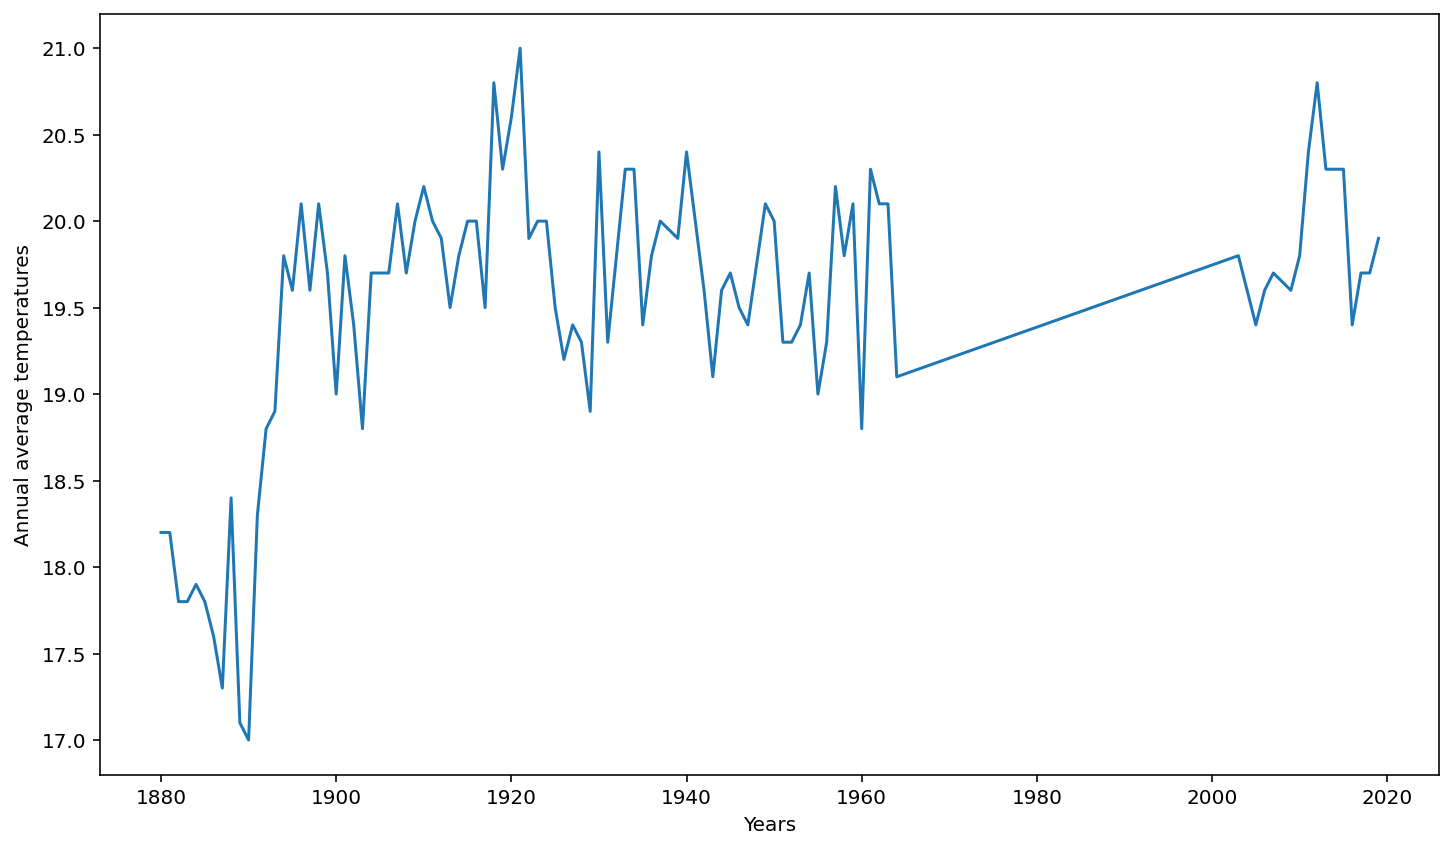

In [38]:
import matplotlib.pyplot as plt

albany = clean(get_table("Albany", STATIONS))

plt.plot(albany[:,0], albany[:,-1])
plt.xlabel("Years")
plt.ylabel("Annual average temperatures")
plt.show()

In [39]:
print(albany[:, 0])

[1880. 1881. 1882. 1883. 1884. 1885. 1886. 1887. 1888. 1889. 1890. 1891.
 1892. 1893. 1894. 1895. 1896. 1897. 1898. 1899. 1900. 1901. 1902. 1903.
 1904. 1906. 1907. 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915. 1916.
 1917. 1918. 1919. 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927. 1928.
 1929. 1930. 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1939. 1940. 1941.
 1942. 1943. 1944. 1945. 1946. 1947. 1949. 1950. 1951. 1952. 1953. 1954.
 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 2003. 2004.
 2005. 2006. 2007. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017.
 2018. 2019.]


You will notice that the plot has not treated missing data well. Rather than a line joining the missing data, it would be more instructive to have a gap. (Our plot of the cleaned data will also not include the final year in the x-axis.)

One way to leave gaps is to ensure all missing years are set to `nan`. Matplotlib will not plot these years.

* To demonstrate this, plot the uncleaned data for Albany.


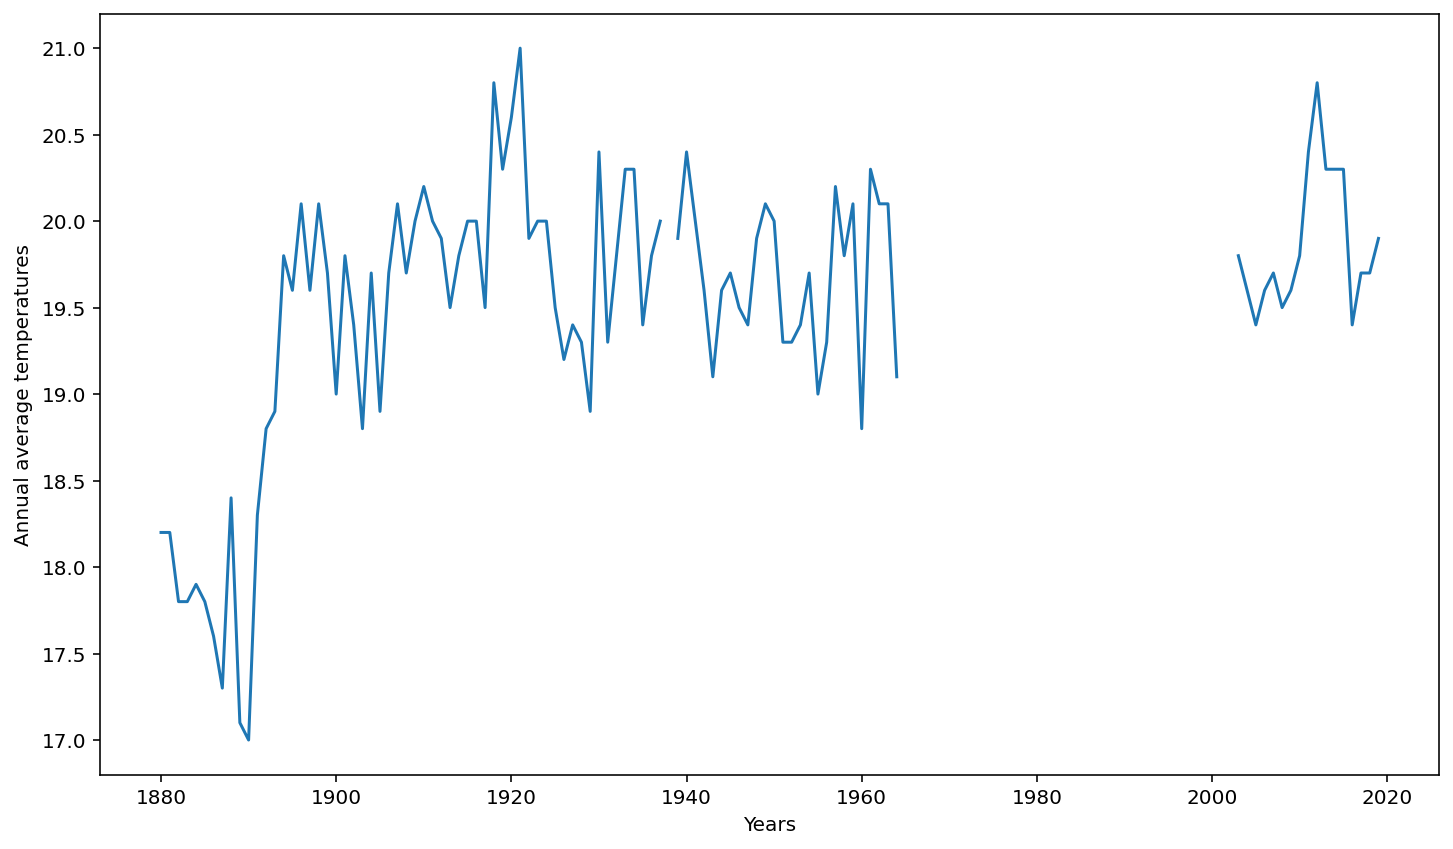

In [40]:
uncleaned_albany_data = get_table("Albany", STATIONS)

plt.plot(uncleaned_albany_data[:,0], uncleaned_albany_data[:,-1])
plt.xlabel("Years")
plt.ylabel("Annual average temperatures")
plt.show()

At first sight this appears to have solved our problem! We can just use the uncleaned data.

But actually this is just a coincidence of our specific data, not a general solution.

Have a look at the data file for Albany. It happens that the gap of missing data from 1966 to 2001 has a null value either side. This causes matplotlib not put a line between those values.

To demonstrate this, we can leave some other gaps without null values. A quick way to do this is by plotting every tenth value.

```
table = get_table("Albany",STATIONS)
plt.plot(table[::10,0], table[::10,-1])
plt.show()
```

* Generate this plot. What do you see?


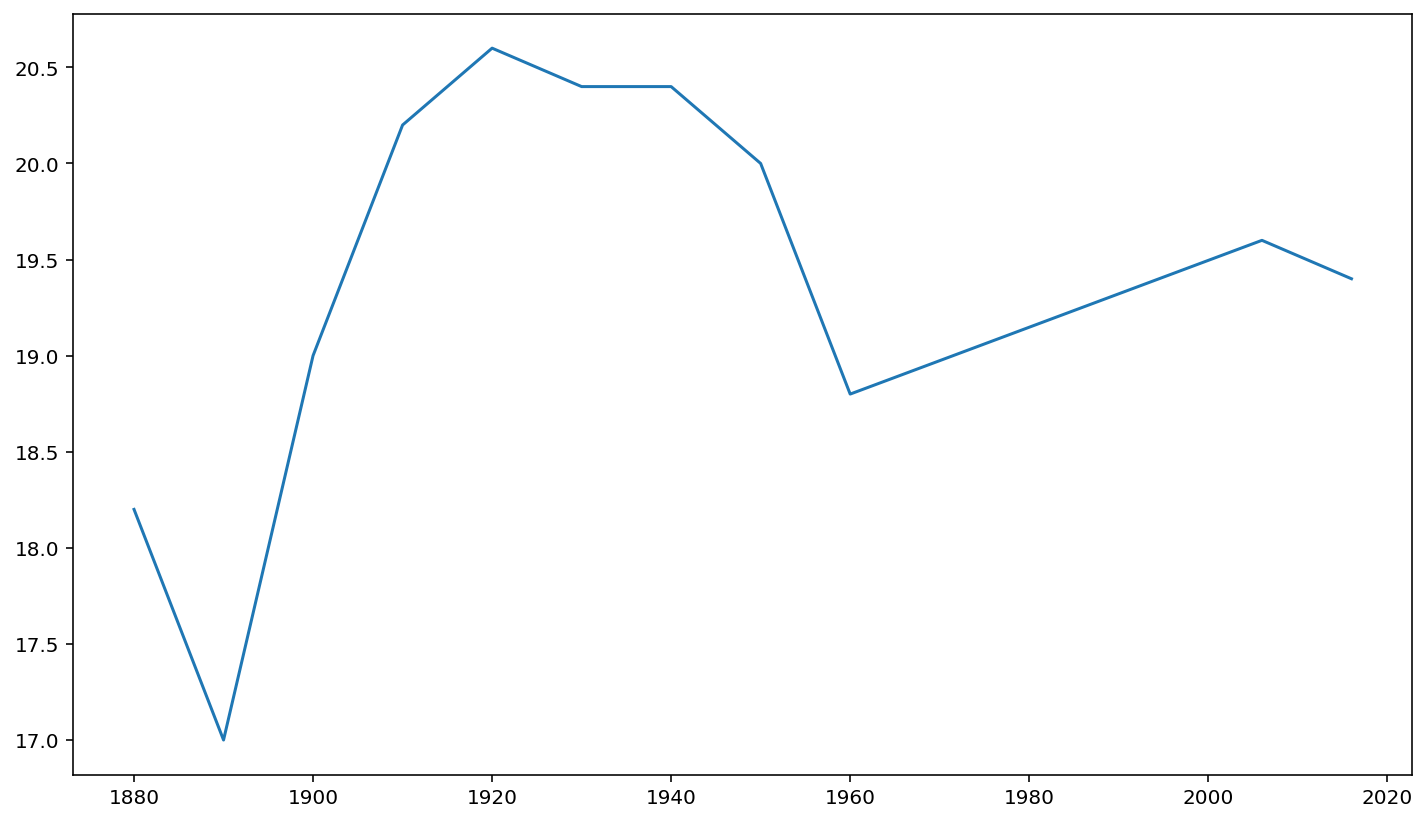

In [41]:
table = get_table("Albany",STATIONS)
plt.plot(table[::10,0], table[::10,-1])
plt.show()

### Augmenting the data

Matplotlib 'does its best' to anticpate what we want to see, and does a pretty good job in general! After all, it filled in all the years on the x-axis for us (allowing us to be a bit lazy), even though we only fed it x values for some of the years.

But it can only do so much. We will need to do it properly.

We will now 'augment' the data by including all of the years ranging from the first to the last year in the data. We will set the missing years to `np.nan` so that they are not plotted.

We can do all of this in numpy without using any loops.


#### Identifying missing years [1 lab mark]

Write a method `missing_years (table)` that takes a (uncleaned) table, and returns an array of years (as integers) that fall within the range of years from the first in the table to the last in the table, that either:
* don't have a reported annual average in the table
* have a reported annual average of "null"

Your method should not use any loops. You can use previously defined methods.

_Hint:_ It is suggested that you break it down into the following steps:
* use the information from the (uncleaned) table to generate an array of all the years in the range of your table
* use the cleaned table to get an array of the years that have valid data
* determine the indices of the valid years in the full range of years
* generate a boolean mask over the full range of years that selects the non-valid years

_Tip:_ You may also find the method `np.astype()` useful.

Check your results are correct by comparing (visually) with the downloaded tables.

In [42]:
def missing_years (table):
    first_year, last_year = int(table[0][0]), int(table[-1][0])
    year_range = np.arange(first_year, last_year + 1, 1)

    mask_for_null_annual_values = np.logical_not(np.isnan(table[:,-1])) # True = don't have null value
    table_removed_null = table[mask_for_null_annual_values]
    years_with_valid_data = table_removed_null[:,0]

    valid_bool = np.isin(year_range, years_with_valid_data)

    invalid_bool = ~valid_bool
    years_with_invalid_data = year_range[invalid_bool]
    return years_with_invalid_data.astype(int)

In [43]:
from nose.tools import assert_equal
assert_equal(missing_years(get_table("Albany", STATIONS))[2], 1966)
assert_equal(len(missing_years(get_table("Albany", STATIONS))), 40)
assert_equal(len(missing_years(get_table("Perth", STATIONS))), 2)


#### Augmenting with `nan` [1 lab mark]

* Write a function `augmented (table)` that returns a pair of arrays:
  * the first is an array of all the years in the range of years covered in the table, as integers
  * the second is an array of floats which contains:
    * the reported annual average for the corresponding year
    * `np.nan` where either the data was null or missing

Again the function should have no loops.

_Hint:_ Use a similar structure to `missing_years`.

Again, check you are getting the right results on the downloaded tables.


In [44]:
def augmented (table):
    first_year, last_year = int(table[0][0]), int(table[-1][0])
    year_range = np.arange(first_year, last_year + 1, 1)

    mask_for_null_annual_values = np.logical_not(np.isnan(table[:,-1])) # True = don't have null value
    table_removed_null = table[mask_for_null_annual_values]
    temp_valid = table_removed_null[:,-1]
    years_with_valid_data = table_removed_null[:,0]

    valid_bool = np.isin(year_range, years_with_valid_data)
    indices_of_valid_years = np.where(valid_bool)[0]

    temp_data = np.full(len(year_range), np.nan)
    temp_data[indices_of_valid_years] = temp_valid

    return year_range, temp_data

In [45]:
# [Modify the tests below for your own problem]
# Check that squares returns the correct output for several inputs:
from nose.tools import assert_equal
assert_equal(augmented(get_table("Albany", STATIONS))[1][84], 19.1)
assert_equal(np.isnan(augmented(get_table("Albany", STATIONS))[1][85]), True)
assert_equal(np.isnan(augmented(get_table("Albany", STATIONS))[1][86]), True)


In [46]:
assert_equal(np.isnan(augmented(get_table("Geraldton",STATIONS))[1][62]), True)
assert_equal(np.isnan(augmented(get_table("Geraldton",STATIONS))[1][11]), True)

* Plot the augmented table for Albany. Is it whate you expected?

In [47]:
year, albany_temp_data = augmented(get_table("Albany", STATIONS))
print(len(year), len(albany_temp_data))

141 141


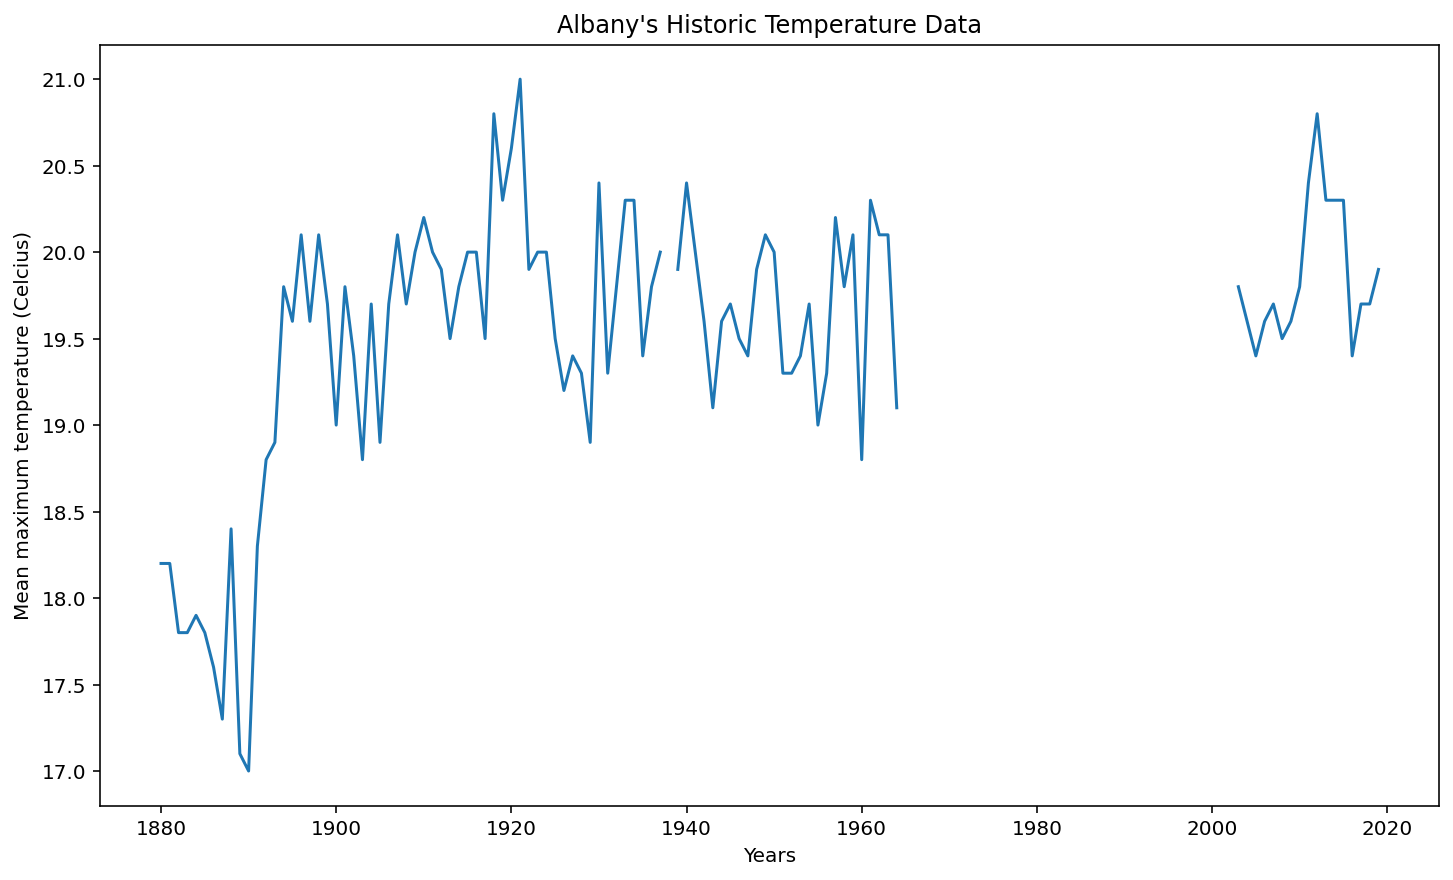

In [48]:
plt.plot(year, albany_temp_data)
plt.title("Albany's Historic Temperature Data")
plt.xlabel("Years")
plt.ylabel("Mean maximum temperature (Celcius)")
plt.show()

## Visualising the Complete Data!

At last its time to plot the historic temperatures. But because we've prepared well, this is very straightforward! It shouldn't more than about 4 lines of code to get and plot the data for all the towns in `STATIONS` (plus a few lines to label the graph).

* Plot all the historical data for average annual temperatures for all towns on a single chart.

Part of the chart should look like this (yours should include all towns and all years):

![](partial-graph.png)

Can you see any trends? How might you quantify this?


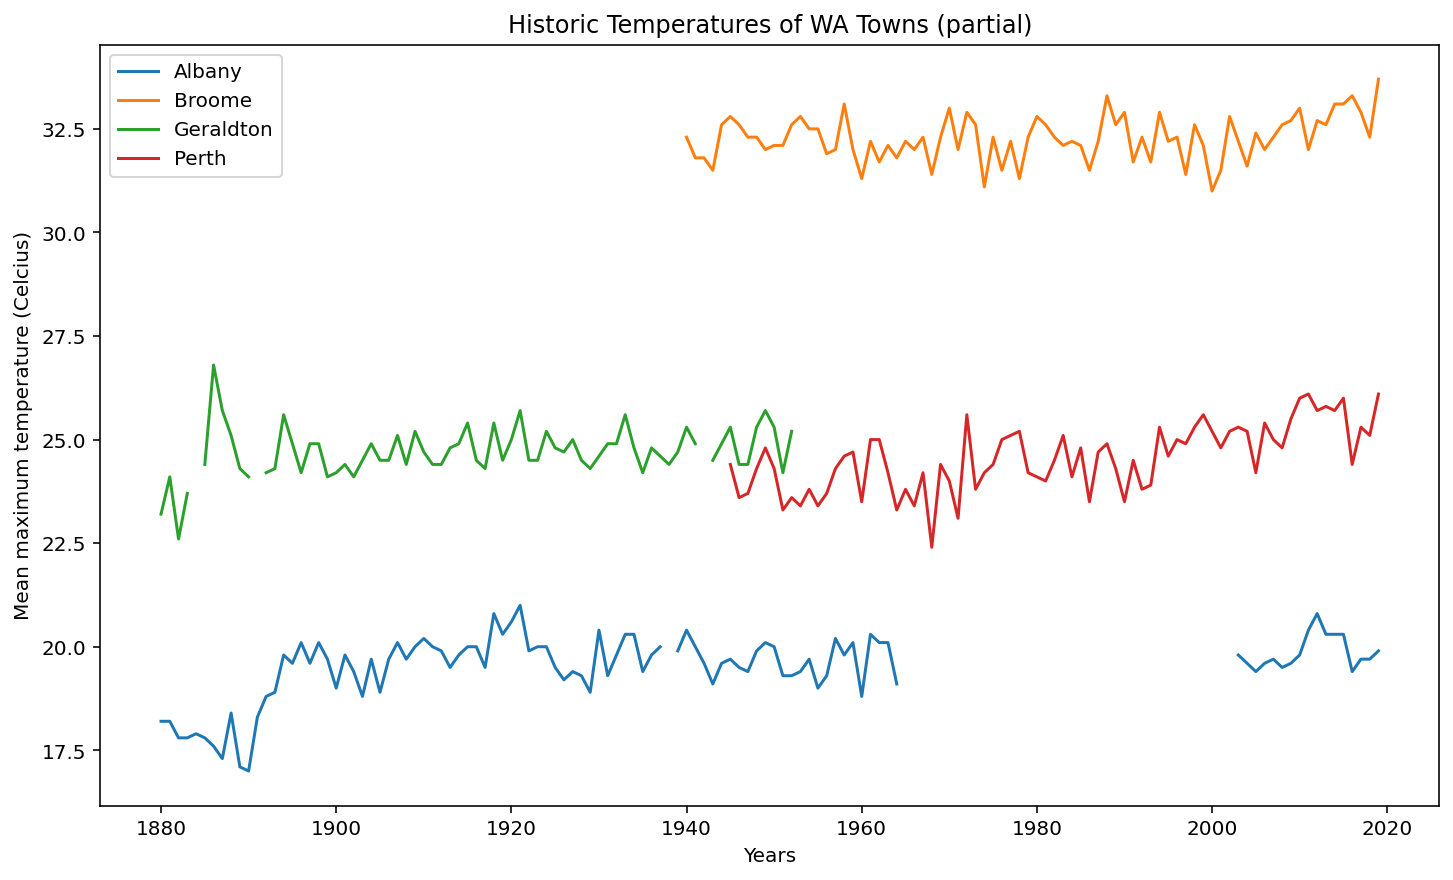

In [49]:
(towns, tables) = get_temperatures(STATIONS)

for i in range(len(towns)):
    town_name, table = towns[i], tables[i]
    (year, temp_data) = augmented(table)
    plt.plot(year, temp_data, label = town_name)
plt.legend()
plt.title("Historic Temperatures of WA Towns (partial)")
plt.xlabel("Years")
plt.ylabel("Mean maximum temperature (Celcius)")
plt.show()

&copy; Cara MacNish